In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

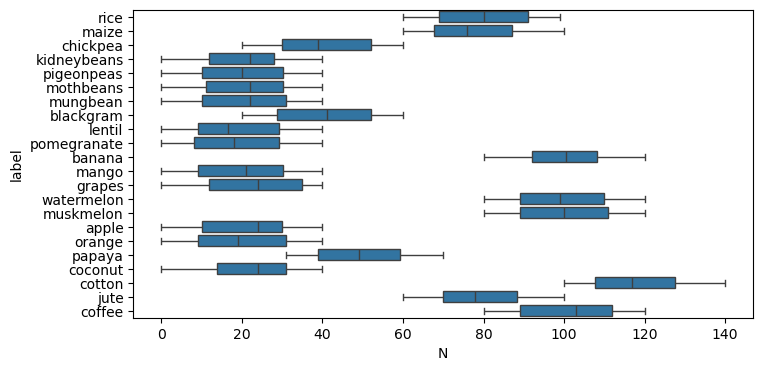

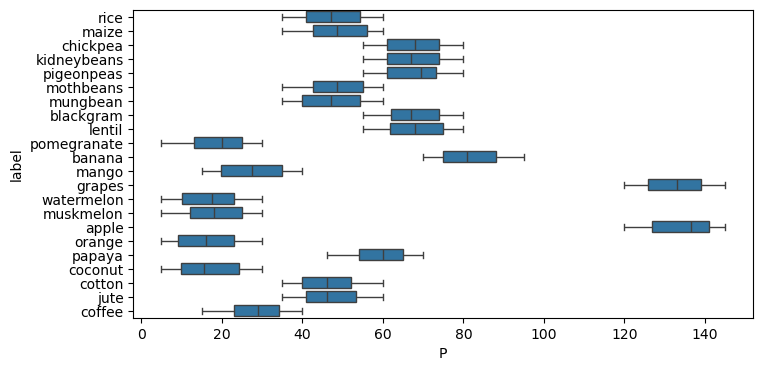

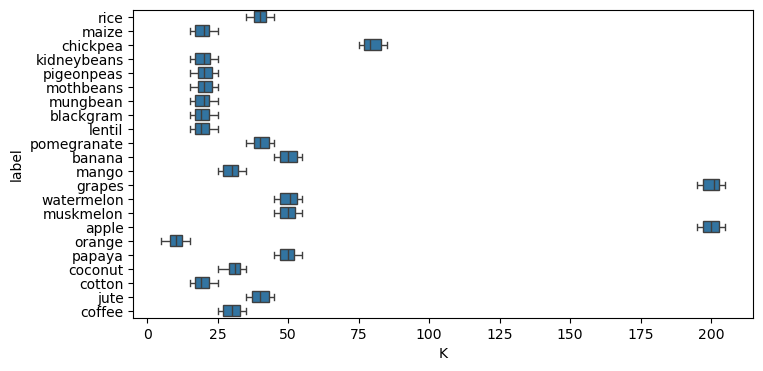

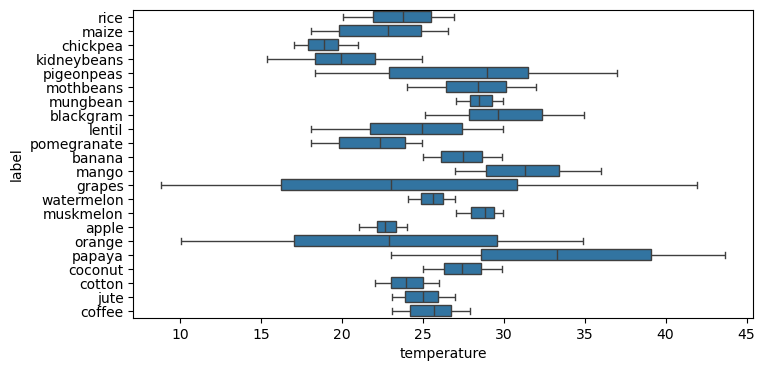

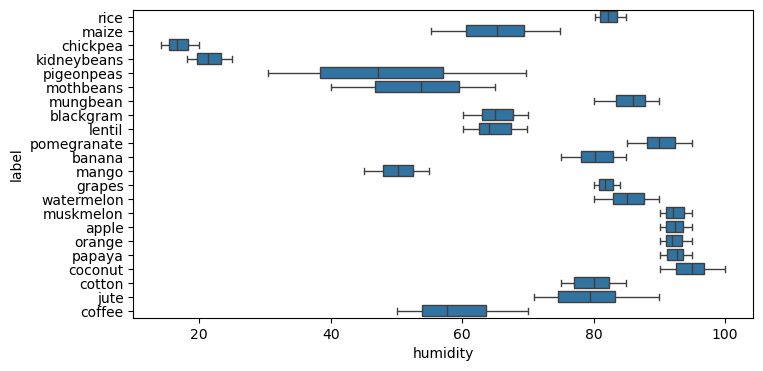

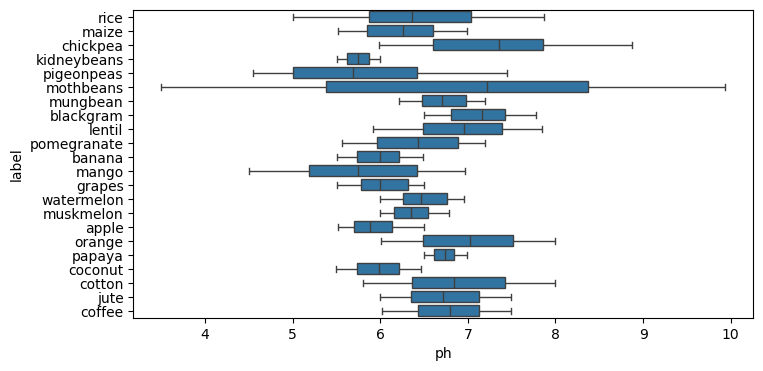

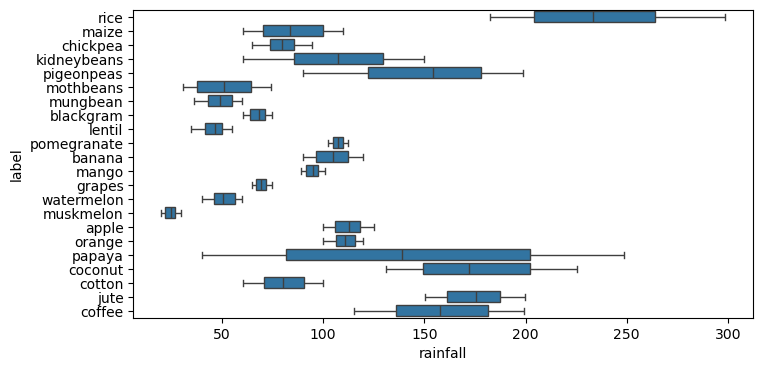

In [4]:
col=["N","P","K","temperature","humidity","ph","rainfall"]
for i in col:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df,x=i,y="label")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: >

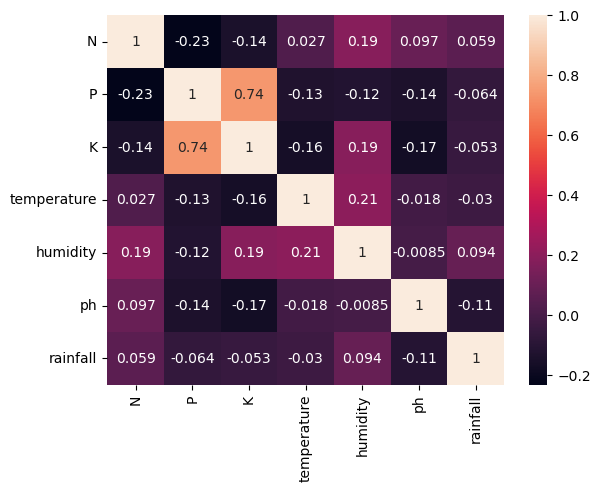

In [6]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
# for i in col:
#     df[i] = df[i].round(2) 
#     df[[i]]=scaler.fit_transform(df[[i]])

In [9]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [11]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [12]:
x=df.drop(["label"],axis=1)
y=df["label"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [14]:
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [15]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
883,14,76,20,29.059412,62.106524,7.042475,36.501137
280,54,62,80,17.489117,16.390554,7.489545,79.457583
443,1,76,17,28.434307,52.100108,6.012719,147.041482
1450,113,20,48,27.465836,94.876790,6.440585,27.278998
930,17,18,43,24.488084,90.836872,5.843005,103.196934
...,...,...,...,...,...,...,...
1747,34,65,48,41.419684,90.038631,6.665025,199.309643
1273,35,135,199,21.774667,80.549426,6.400720,69.396304
1083,95,88,52,28.003160,78.900860,6.235462,94.681803
480,27,74,20,24.694877,59.966692,5.859813,91.957924


In [16]:
# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# model.fit(x_train,y_train)

In [17]:
# y_pred=model.predict(x_test)

In [18]:
# y_pred.round()

In [19]:
from sklearn.metrics import r2_score
# r2=r2_score(y_test,y_pred.round())

In [20]:
# r2

In [21]:
# n=x_test.shape[0]
# p=x_test.shape[1]
# adj_r2=1-((1-r2)*(n-1))/(n-p-1)
# adj_r2

In [22]:
# result=[]
# result.append({
#     "model":"Linear Regression","r2":r2,"adj_r2":adj_r2
# })

In [23]:
from xgboost import XGBRegressor,XGBClassifier
# xg=XGBRegressor()
# xg.fit(x_train,y_train)

In [24]:
# y_pred_xg=xg.predict(x_test)

In [25]:
# from sklearn.metrics import r2_score
# r2=r2_score(y_test,y_pred_xg.round())
# r2

In [26]:
# n=x_test.shape[0]
# p=x_test.shape[1]
# adj_r2=1-((1-r2)*(n-1))/(n-p-1)
# adj_r2

In [27]:

# result.append({
#     "model":"XG Boost Regressor","r2":r2,"adj_r2":adj_r2
# })

In [28]:
# result

In [29]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
# models={"Gradient Boosting Regressor": GradientBoostingRegressor(),"Ada Boost Regressor":AdaBoostRegressor(),"Random Forest Regressor":RandomForestRegressor()}
# for i,model in models.items():
#     model.fit(x_train,y_train)
#     model.predict(x_test)
#     r2=r2_score(y_test,y_pred.round())
#     n=x_test.shape[0]
#     p=x_test.shape[1]
#     adj_r2=1-((1-r2)*(n-1))/(n-p-1)
#     result.append({
#     "model":i,"r2":r2,"adj_r2":adj_r2
#     })

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

In [31]:
models= {
    "logistic_regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Neive_bayes":GaussianNB(),
    "Decision_tree":DecisionTreeClassifier(),
    "SVM":SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "XGBoost Classifier":XGBClassifier()
}
result2=[]

In [32]:
for name,model in models.items():
    model.fit(x_train_scaler,y_train)
    y_pred= model.predict(x_test_scaler)
    acc=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred,average='weighted')
    pre=precision_score(y_test,y_pred,average='weighted')
    # scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    result2.append({
        "model":name,"accuracy":round(acc,4),'recall':round(recall,4),'precision':round(pre,4)})

In [33]:
# pd.DataFrame(result)

In [34]:
pd.DataFrame(result2)

,model,accuracy,recall,precision
0,logistic_regression,0.9614,0.9614,0.9714
1,KNN,0.9682,0.9682,0.9709
2,Neive_bayes,0.9977,0.9977,0.9978
3,Decision_tree,0.9250,0.9250,0.9375
4,SVM,0.9795,0.9795,0.9829
5,Gradient Boosting Classifier,0.9500,0.9500,0.9578
6,Ada Boost Classifier,0.1364,0.1364,0.0631
7,Random Forest Classifier,0.9841,0.9841,0.9870
8,XGBoost Classifier,0.9432,0.9432,0.9493


In [35]:
import joblib
joblib.dump(models["Random Forest Classifier"], "model.pkl")

['model.pkl']

In [36]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [37]:
joblib.dump(x.columns.tolist(),"coloum.pkl")

['coloum.pkl']

In [38]:
x.columns.tolist()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [39]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']